In [110]:
import pandas as pd
import numpy as np

In [111]:
df = pd.read_csv('aspect_sentiment.csv')
df.shape, df.columns

((3696, 3), Index(['sentence', 'aspect', 'sentiment'], dtype='object'))

In [112]:
df['sentiment'].value_counts()

sentiment
Negative                                         2177
Positive                                         1272
Neutral                                           233
{"choices":["Positive","Negative"]}                 6
{"choices":["Positive","Neutral"]}                  6
{"choices":["Negative","Neutral"]}                  1
{"choices":["Positive","Negative","Neutral"]}       1
Name: count, dtype: int64

In [113]:
valid_sentiments = ['Positive', 'Negative', 'Neutral']
# , 'Neutral'
df = df[df['sentiment'].isin(valid_sentiments)]

<Axes: ylabel='count'>

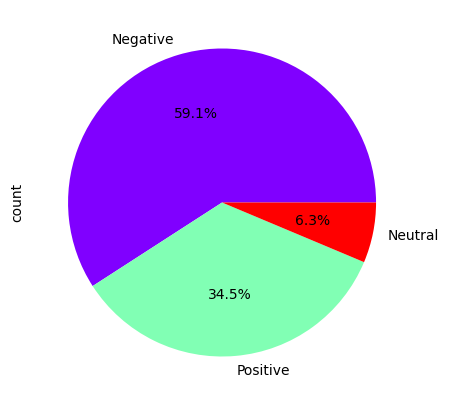

In [114]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5), colormap='rainbow')

In [115]:
df['sentiment'] = df['sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

In [116]:
df['pair'] = df['sentence'] + ' [ASP] ' + df['aspect']
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', None) 
df.head()

,sentence,aspect,sentiment,pair
0,i have been to this place for random dinner with friends and it was the most stupid decision,other,0,i have been to this place for random dinner with friends and it was the most stupid decision [ASP] other
1,the place is the perfect example of mismanagement,service,0,the place is the perfect example of mismanagement [ASP] service
2,the food was also pathetic,quality,0,the food was also pathetic [ASP] quality
3,we have ordered sambhar rice after a lot of disappointment thinking that atleast it will come on time and will be good in taste but i guess they were checking our patience and it took almost mins for us to get that,quality,0,we have ordered sambhar rice after a lot of disappointment thinking that atleast it will come on time and will be good in taste but i guess they were checking our patience and it took almost mins for us to get that [ASP] quality
4,we have ordered sambhar rice after a lot of disappointment thinking that atleast it will come on time and will be good in taste but i guess they were checking our patience and it took almost mins for us to get that,service,0,we have ordered sambhar rice after a lot of disappointment thinking that atleast it will come on time and will be good in taste but i guess they were checking our patience and it took almost mins for us to get that [ASP] service


In [117]:
df.drop(columns=['sentence', 'aspect'], inplace=True)

# ML

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(df['pair'], df['sentiment'], test_size=0.2, random_state=42)

In [119]:
def evaluate_model(y_test, y_pred):
    labels = [1, 0, 2]  # Positive, Negative, Neutral
    print(classification_report(y_test, y_pred, labels=labels))
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    # print(f"          Pred_Pos   Pred_Neg")
    # print(f"True_Pos     {cm[0][0]:>5}      {cm[0][1]:>5}")
    # print(f"True_Neg     {cm[1][0]:>5}      {cm[1][1]:>5}")
    # 
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    print("Confusion Matrix:")
    print(f"True\\Pred:  Positive   Neutral   Negative")
    print(f"Positive     {cm[0][0]:>5}      {cm[0][1]:>5}      {cm[0][2]:>5}")
    print(f"Neutral      {cm[1][0]:>5}      {cm[1][1]:>5}      {cm[1][2]:>5}")
    print(f"Negative     {cm[2][0]:>5}      {cm[2][1]:>5}      {cm[2][2]:>5}")

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

In [121]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred)
    return model.score(X_test, y_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Linear SVC': LinearSVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42)
}

In [122]:
df

,sentiment,pair
0,0,i have been to this place for random dinner with friends and it was the most stupid decision [ASP] other
1,0,the place is the perfect example of mismanagement [ASP] service
2,0,the food was also pathetic [ASP] quality
3,0,we have ordered sambhar rice after a lot of disappointment thinking that atleast it will come on time and will be good in taste but i guess they were checking our patience and it took almost mins for us to get that [ASP] quality
4,0,we have ordered sambhar rice after a lot of disappointment thinking that atleast it will come on time and will be good in taste but i guess they were checking our patience and it took almost mins for us to get that [ASP] service
...,...,...
3691,1,tasty and filling great portions of the veggies rice sauce although rice wasnt sticky and i thought dolsot bap always came with hot claypot nevertheless tasty [ASP] quality
3692,2,in the middle of the meal we asked for hot sauce and there came the sauce very tiny quantity we were like wtf the sauce was hot made from naga chillies yet sooo good burned my tongue but loved every bit of it so if you have rice remaining give this a try as well [ASP] quality
3693,1,staff were courteous as well [ASP] service
3694,0,one star less just for the tofu [ASP] quality


## TF-IDF
TF-IDF biến văn bản thành vector số dựa trên độ quan trọng của các từ trong văn bản, so với toàn bộ tập dữ liệu.

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [124]:
stopwords_list = set(stopwords.words("english"))
print(f'List of stopwords: {len(stopwords_list)}\n{stopwords_list}\n')

# We remove negation words in list of stopwords
no_stopwords = ["not", "nor", "don't",'aren','don','zain',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
               'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
               "won't", 'wouldn', "wouldn't"]
stopwords_list -= set(no_stopwords)
    
print(f'Final list of stopwords: {len(stopwords_list)}\n{stopwords_list}')

List of stopwords: 198
{'from', 'mightn', 'being', "they're", "it'd", 'that', 'i', 'weren', 'll', 'a', 'had', 're', 'he', 'by', 'too', 'y', 'yourself', 'which', 'but', "haven't", 'you', 'between', 'these', 'against', 'those', 'and', "should've", 'isn', "you've", 'was', "weren't", 'further', 'has', 'just', 's', 'ourselves', 'when', 'yours', "i'd", 'as', "he's", 'own', "i'm", 'than', "mustn't", "they'd", "he'll", 'during', 'its', 'whom', "wasn't", 'same', 'will', 'been', 'wouldn', "i've", 'all', 'no', 'until', 'herself', 'himself', 'on', 'to', 'ma', 'while', 'they', 'where', "we'd", 'some', 'them', 'for', 'myself', "shan't", 'am', 'out', "you'll", 'below', 'their', 'at', 'were', "he'd", 'each', 'are', 'having', 'hadn', "don't", 'shan', 'd', "we're", 'over', 'how', 't', 'what', 'an', "i'll", 'did', 'of', 'shouldn', 'theirs', 'under', 'wasn', 'mustn', "didn't", 'up', 'nor', 'does', 'then', 'before', 'other', 'above', 'because', 'more', 'through', "it's", 'very', "doesn't", "we'll", 'is', '

In [125]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words=stopwords_list)
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [127]:
tfidf_acc = {}
for model_name, model in models.items():
    print(model_name)
    accuracy = train_and_evaluate(model, X_train_vec, y_train, X_test_vec, y_test)
    tfidf_acc[model_name] = accuracy

Logistic Regression
              precision    recall  f1-score   support

           1       0.78      0.77      0.78       244
           0       0.84      0.93      0.88       446
           2       0.25      0.02      0.04        47

    accuracy                           0.82       737
   macro avg       0.62      0.57      0.57       737
weighted avg       0.78      0.82      0.79       737

Confusion Matrix:
True\Pred:  Positive   Neutral   Negative
Positive       188         54          2
Neutral         30        415          1
Negative        23         23          1
Linear SVC
              precision    recall  f1-score   support

           1       0.79      0.81      0.80       244
           0       0.87      0.90      0.88       446
           2       0.48      0.26      0.33        47

    accuracy                           0.83       737
   macro avg       0.71      0.65      0.67       737
weighted avg       0.82      0.83      0.82       737

Confusion Matrix:
True\P

In [128]:
results_df = pd.DataFrame.from_dict(tfidf_acc, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\nTF-IDF Results:")
print(results_df)


TF-IDF Results:
                     Accuracy
Linear SVC           0.827680
XGBoost              0.823609
Logistic Regression  0.819539
Random Forest        0.784261


## USE

In [129]:
import tensorflow_hub as hub
import tensorflow as tf

In [130]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

X_train_embed = embed(X_train.tolist())
X_test_embed = embed(X_test.tolist())

X_train_embed = np.array(X_train_embed)
X_test_embed = np.array(X_test_embed)

In [131]:
X_train_embed

array([[-0.0165312 ,  0.02090786,  0.03788833, ...,  0.00126397,
         0.04242896, -0.01333553],
       [-0.01650475,  0.00973329,  0.04217643, ..., -0.03587803,
         0.00327561, -0.03875838],
       [ 0.01895647, -0.0540335 ,  0.04090199, ...,  0.03094948,
         0.00018083, -0.07994617],
       ...,
       [ 0.05368351, -0.06163985,  0.03541627, ..., -0.02721667,
         0.02429274, -0.00480506],
       [ 0.03283805, -0.00394677, -0.06708228, ...,  0.03182586,
         0.04800351, -0.05026051],
       [-0.0049367 , -0.02015531,  0.0106606 , ..., -0.01440705,
         0.00914706, -0.08118436]], dtype=float32)

In [132]:
train_and_evaluate(models['Logistic Regression'], X_train_embed, y_train, X_test_embed, y_test)

              precision    recall  f1-score   support

           1       0.81      0.85      0.83       244
           0       0.87      0.93      0.90       446
           2       0.75      0.06      0.12        47

    accuracy                           0.85       737
   macro avg       0.81      0.62      0.62       737
weighted avg       0.84      0.85      0.83       737

Confusion Matrix:
True\Pred:  Positive   Neutral   Negative
Positive       207         37          0
Neutral         28        417          1
Negative        20         24          3


0.8507462686567164

In [133]:
use_acc = {}
for model_name, model in models.items():
    print(model_name)
    accuracy = train_and_evaluate(model, X_train_embed, y_train, X_test_embed, y_test)
    use_acc[model_name] = accuracy

Logistic Regression
              precision    recall  f1-score   support

           1       0.81      0.85      0.83       244
           0       0.87      0.93      0.90       446
           2       0.75      0.06      0.12        47

    accuracy                           0.85       737
   macro avg       0.81      0.62      0.62       737
weighted avg       0.84      0.85      0.83       737

Confusion Matrix:
True\Pred:  Positive   Neutral   Negative
Positive       207         37          0
Neutral         28        417          1
Negative        20         24          3
Linear SVC
              precision    recall  f1-score   support

           1       0.82      0.84      0.83       244
           0       0.87      0.93      0.90       446
           2       0.50      0.11      0.18        47

    accuracy                           0.85       737
   macro avg       0.73      0.62      0.63       737
weighted avg       0.83      0.85      0.83       737

Confusion Matrix:
True\P

In [134]:
results_df = pd.DataFrame.from_dict(use_acc, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\nUSE Results:")
print(results_df)


USE Results:
                     Accuracy
Logistic Regression  0.850746
Linear SVC           0.845319
XGBoost              0.834464
Random Forest        0.819539


## TF-IDF + USE

In [135]:
X_train_combined = np.hstack((X_train_vec.toarray(), X_train_embed))
X_test_combined = np.hstack((X_test_vec.toarray(), X_test_embed))

In [136]:
combined_acc = {}
for model_name, model in models.items():
    print(model_name)
    accuracy = train_and_evaluate(model, X_train_combined, y_train, X_test_combined, y_test)
    combined_acc[model_name] = accuracy

Logistic Regression
              precision    recall  f1-score   support

           1       0.84      0.84      0.84       244
           0       0.88      0.95      0.91       446
           2       0.57      0.17      0.26        47

    accuracy                           0.86       737
   macro avg       0.77      0.65      0.67       737
weighted avg       0.85      0.86      0.85       737

Confusion Matrix:
True\Pred:  Positive   Neutral   Negative
Positive       204         36          4
Neutral         20        424          2
Negative        18         21          8
Linear SVC
              precision    recall  f1-score   support

           1       0.82      0.84      0.83       244
           0       0.88      0.90      0.89       446
           2       0.45      0.30      0.36        47

    accuracy                           0.84       737
   macro avg       0.72      0.68      0.69       737
weighted avg       0.83      0.84      0.84       737

Confusion Matrix:
True\P

In [137]:
results_df = pd.DataFrame.from_dict(combined_acc, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\nUSE Results:")
print(results_df)


USE Results:
                     Accuracy
Logistic Regression  0.862958
XGBoost              0.848033
Linear SVC           0.841248
Random Forest        0.822252


## visualization

In [138]:
tfidf_acc, use_acc, combined_acc

({'Logistic Regression': 0.819538670284939,
  'Linear SVC': 0.8276797829036635,
  'Random Forest': 0.7842605156037992,
  'XGBoost': 0.8236092265943012},
 {'Logistic Regression': 0.8507462686567164,
  'Linear SVC': 0.8453188602442334,
  'Random Forest': 0.819538670284939,
  'XGBoost': 0.8344640434192673},
 {'Logistic Regression': 0.8629579375848032,
  'Linear SVC': 0.841248303934871,
  'Random Forest': 0.8222523744911805,
  'XGBoost': 0.8480325644504749})

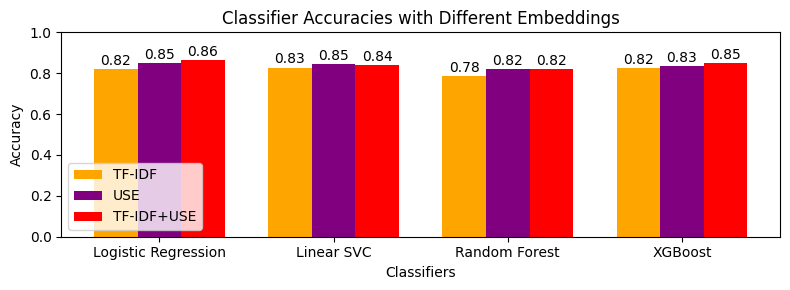

In [139]:
import matplotlib.pyplot as plt

classifiers = list(models.keys())
tfidf_values = list(tfidf_acc.values())
use_values = list(use_acc.values())
combined_values = list(combined_acc.values())

x = np.arange(len(classifiers))

bar_width = 0.25
plt.figure(figsize=(8, 3))
plt.bar(x - bar_width, tfidf_values, bar_width, label='TF-IDF', color='orange')
plt.bar(x, use_values, bar_width, label='USE', color='purple')
plt.bar(x + bar_width, combined_values, bar_width, label='TF-IDF+USE', color='red')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies with Different Embeddings')
plt.xticks(x, classifiers)
plt.ylim(0, 1.0)
plt.legend()

# Add accuracy values on top of the bars
for i in range(len(classifiers)):
    plt.text(x[i] - bar_width, tfidf_values[i] + 0.02, f"{tfidf_values[i]:.2f}", ha='center')
    plt.text(x[i], use_values[i] + 0.02, f"{use_values[i]:.2f}", ha='center')
    plt.text(x[i] + bar_width, combined_values[i] + 0.02, f"{combined_values[i]:.2f}", ha='center')


# Display the plot
plt.tight_layout()
plt.show()

MODELS THAT MORE SUITABLE FOR USE

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(256,128), max_iter=500, random_state=42)
mlp.fit(X_train_embed, y_train)
evaluate_model(y_test, mlp.predict(X_test_embed))

              precision    recall  f1-score   support

           1       0.83      0.79      0.81       244
           0       0.86      0.90      0.88       446
           2       0.38      0.32      0.35        47

    accuracy                           0.83       737
   macro avg       0.69      0.67      0.68       737
weighted avg       0.82      0.83      0.82       737

Confusion Matrix:
True\Pred:  Positive   Neutral   Negative
Positive       192         43          9
Neutral         28        403         15
Negative        12         20         15
None
